In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('merged.csv', on_bad_lines='skip')
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nLabel distribution:")
print(df['label'].value_counts())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184576 entries, 0 to 184575
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                184576 non-null  object 
 1   path                     184575 non-null  object 
 2   sentence                 184575 non-null  object 
 3   up_votes                 184575 non-null  float64
 4   down_votes               184575 non-null  float64
 5   age                      184575 non-null  object 
 6   gender                   184575 non-null  object 
 7   accent                   138702 non-null  object 
 8   label                    184575 non-null  float64
 9   energy                   142815 non-null  float64
 10  entropy_of_energy        142815 non-null  float64
 11  tempo                    142815 non-null  float64
 12  rms_mean                 142815 non-null  float64
 13  rms_std                  142815 non-null  float64
 14  rms_

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,label,energy,...,spectral_bandwidth_min,spectral_bandwidth_max,spectral_rolloff_mean,spectral_rolloff_std,spectral_rolloff_min,spectral_rolloff_max,pitch_mean,pitch_std,pitch_min,pitch_max
0,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687170.mp3,He associated with the Formists.,2.0,1.0,fifties,female,us,3.0,0.001645,...,0.000000,5108.478794,7057.530242,2143.861666,0.000,14765.6250,235.965819,178.920831,100.0,1000.0
1,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687171.mp3,"The ""ultra accelerator"" injection gives Derric...",2.0,1.0,fifties,female,us,3.0,0.006090,...,673.177206,5002.084333,5255.252101,2433.141997,328.125,13687.5000,280.350955,239.084933,100.0,1000.0
2,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687172.mp3,"Despite running as a joke, candidates have won...",2.0,0.0,fifties,female,us,3.0,0.007691,...,578.757660,4883.381949,5636.947151,2441.295517,562.500,13500.0000,277.430637,222.744469,100.0,1000.0
3,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687173.mp3,Stoner also guest-starred in the television dr...,2.0,0.0,fifties,female,us,3.0,0.010188,...,630.182280,4392.144512,5437.201644,2378.380050,375.000,11320.3125,260.133953,200.913532,100.0,1000.0
4,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687174.mp3,Rainelle was named for the Raine family.,2.0,0.0,fifties,female,us,3.0,0.006867,...,641.842189,4848.162648,5859.071929,2435.178730,468.750,11976.5625,252.403846,180.415438,100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184571,d33c17f7a99a80fa806799ab7d5d57b10c2a111fffc4f6...,common_voice_en_93855.mp3,A hundred nuns stampeded the Vatican.,2.0,1.0,twenties,female,other,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184572,d33c17f7a99a80fa806799ab7d5d57b10c2a111fffc4f6...,common_voice_en_93856.mp3,Let me touch you!,2.0,0.0,twenties,female,other,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184573,d33c17f7a99a80fa806799ab7d5d57b10c2a111fffc4f6...,common_voice_en_93857.mp3,It must be some kind of a gag.,3.0,2.0,twenties,female,other,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184574,d33c17f7a99a80fa806799ab7d5d57b10c2a111fffc4f6...,common_voice_en_93858.mp3,Wait till those two future jailbirds read the ...,2.0,0.0,twenties,female,other,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_clean = df.dropna(subset=['energy'], how='all')

print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")

Original shape: (184576, 36), Cleaned shape: (142815, 36)


In [5]:
# Calculate signal-to-noise ratio (approximation)
df_clean['snr'] = df_clean['rms_mean'] / (df_clean['rms_std'] + 1e-10)

# Create a "vocal range" feature
df_clean['vocal_range'] = df_clean['pitch_max'] - df_clean['pitch_min']

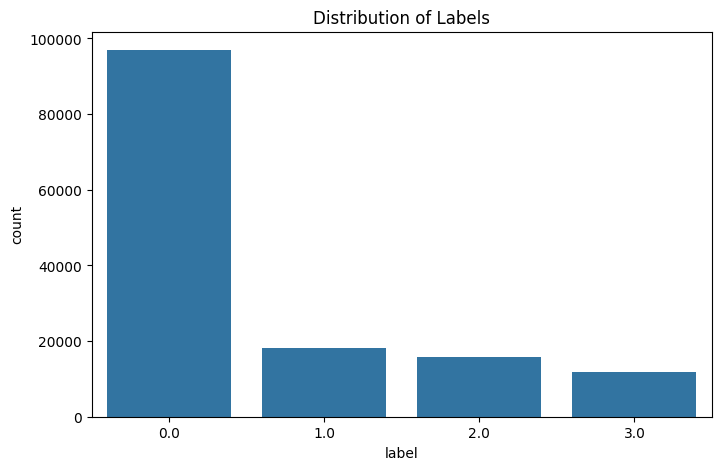

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df_clean)
plt.title('Distribution of Labels')
plt.show()

In [68]:
# label_0_indices = df_clean[df_clean['label'] == 0].index[:100000]
# df_clean = df_clean.drop(label_0_indices)

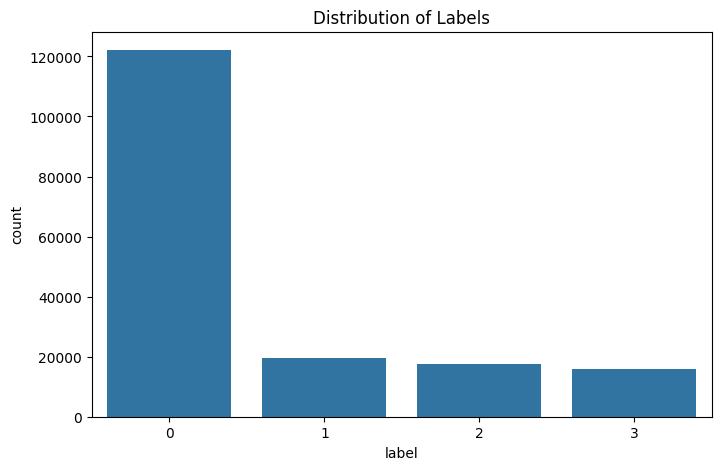

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df_clean)
plt.title('Distribution of Labels')
plt.show()

In [15]:
import pandas as pd
from sklearn.utils import resample

# Separate each class
df_majority_1 = df_clean[df_clean.label == 0]
df_class_1  = df_clean[df_clean.label == 1]
df_class_2  = df_clean[df_clean.label == 2]
df_class_3  = df_clean[df_clean.label == 3]

df_majority_2 = df_clean[df_clean.gender == "male"]
df_class_4  = df_clean[df_clean.gender == 'male']
df_class_5  = df_clean[df_clean.gender == 'female']

df_majority_3 = df_clean[df_clean.age == "twenties"]
df_class_6  = df_clean[df_clean.age == 'twenties']
df_class_7  = df_clean[df_clean.age == 'fifties']


# Get the size of the majority class
n_samples_1 = len(df_majority_1)
n_samples_2 = len(df_majority_2)
n_samples_3 = len(df_majority_3)

# Upsample each minority class
df_class_1_upsampled = resample(df_class_1, replace=True, n_samples=n_samples_1, random_state=42)
df_class_2_upsampled = resample(df_class_2, replace=True, n_samples=n_samples_1, random_state=42)
df_class_3_upsampled = resample(df_class_3, replace=True, n_samples=n_samples_1, random_state=42)
df_class_5_upsampled = resample(df_class_5, replace=True, n_samples=n_samples_2, random_state=42)
df_class_7_upsampled = resample(df_class_7, replace=True, n_samples=n_samples_3, random_state=42)


# Combine back all classes
df_upsampled = pd.concat([df_majority_1, df_class_1_upsampled, df_class_2_upsampled, df_class_3_upsampled])
df_upsampled = pd.concat([df_majority_2, df_class_5_upsampled])
df_upsampled = pd.concat([df_majority_3, df_class_7_upsampled])

# Shuffle the dataset
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_clean = df_upsampled


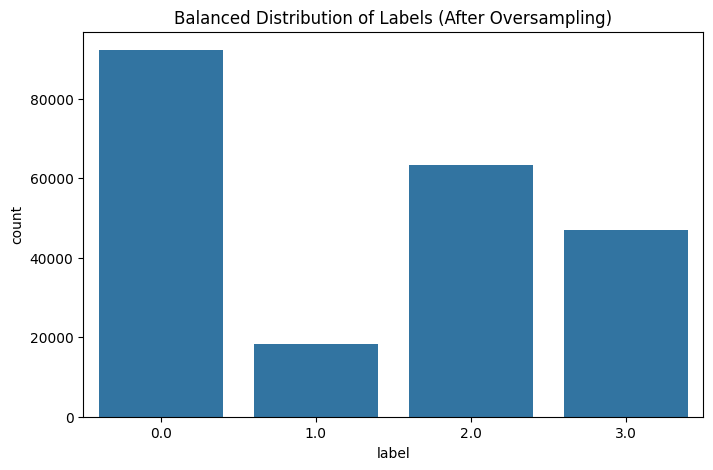

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df_clean)
plt.title('Balanced Distribution of Labels (After Oversampling)')
plt.show()


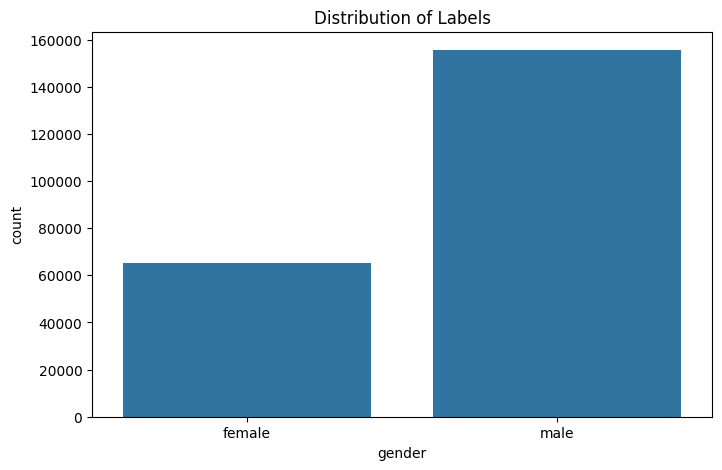

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender', data=df_clean)
plt.title('Distribution of Labels')
plt.show()

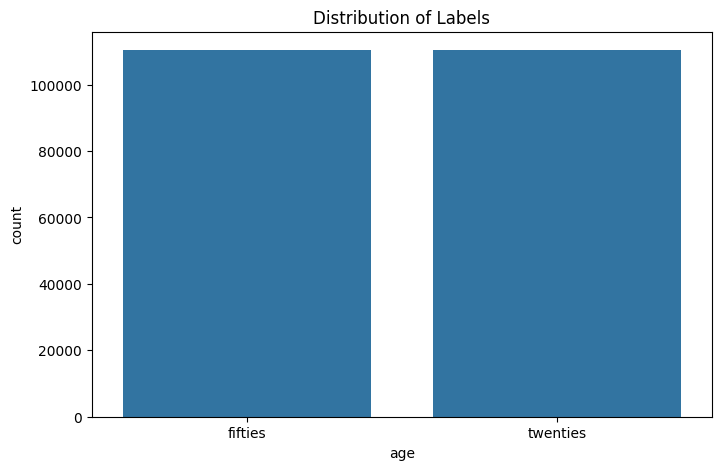

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='age', data=df_clean)
plt.title('Distribution of Labels')
plt.show()

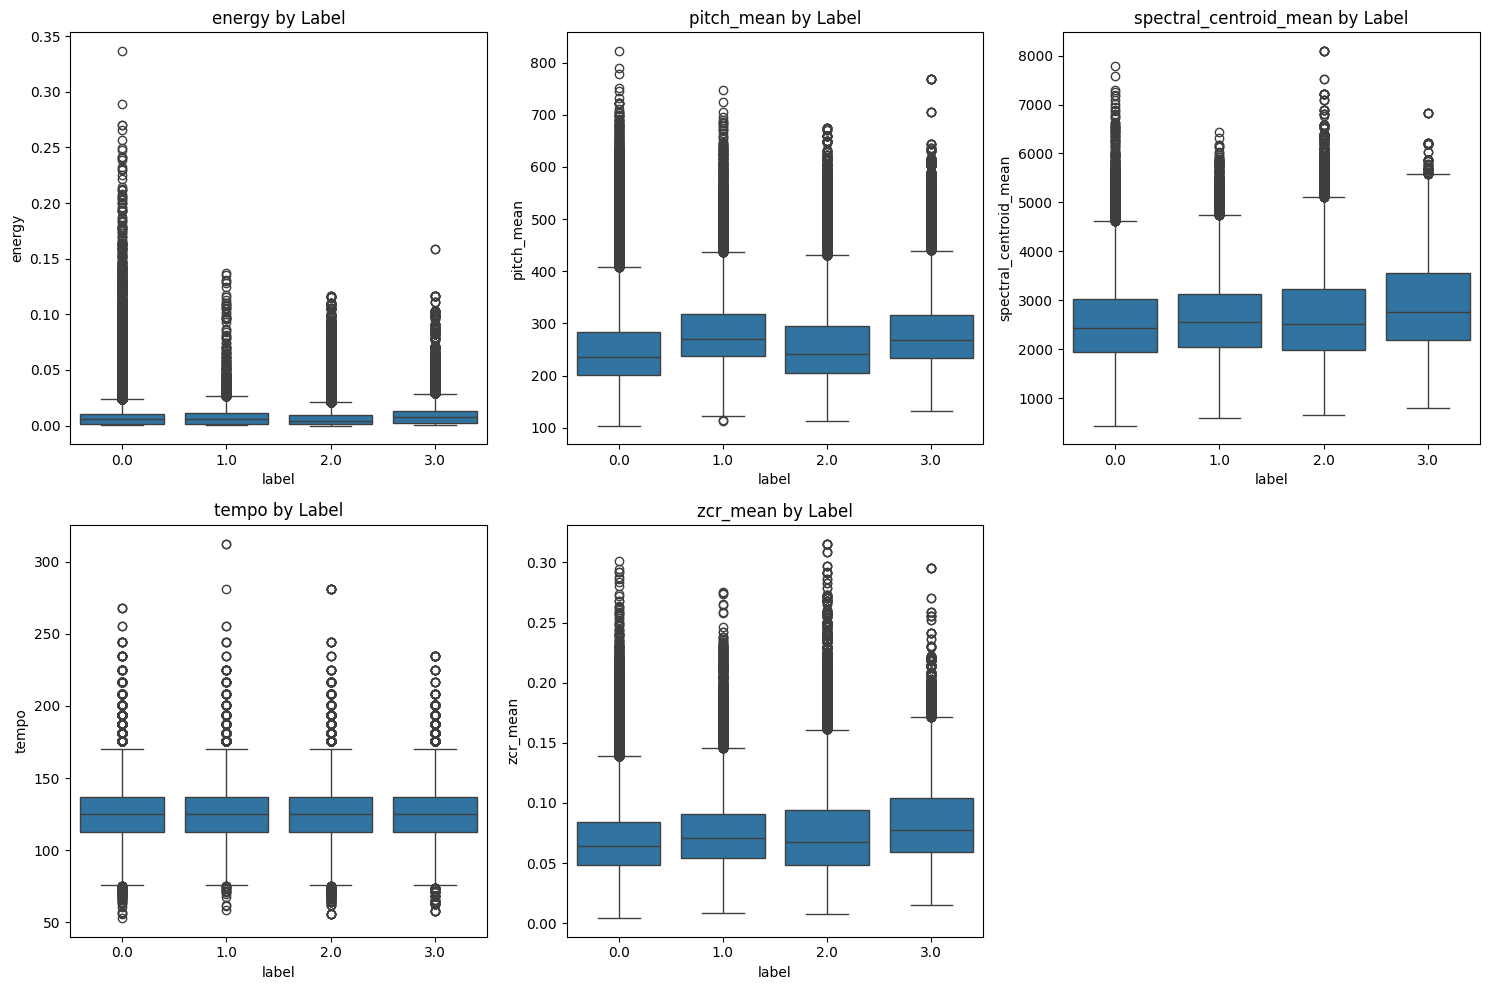

In [19]:
features_to_plot = ['energy', 'pitch_mean', 'spectral_centroid_mean', 'tempo', 'zcr_mean']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=feature, data=df_clean)
    plt.title(f'{feature} by Label')
plt.tight_layout()
plt.show()

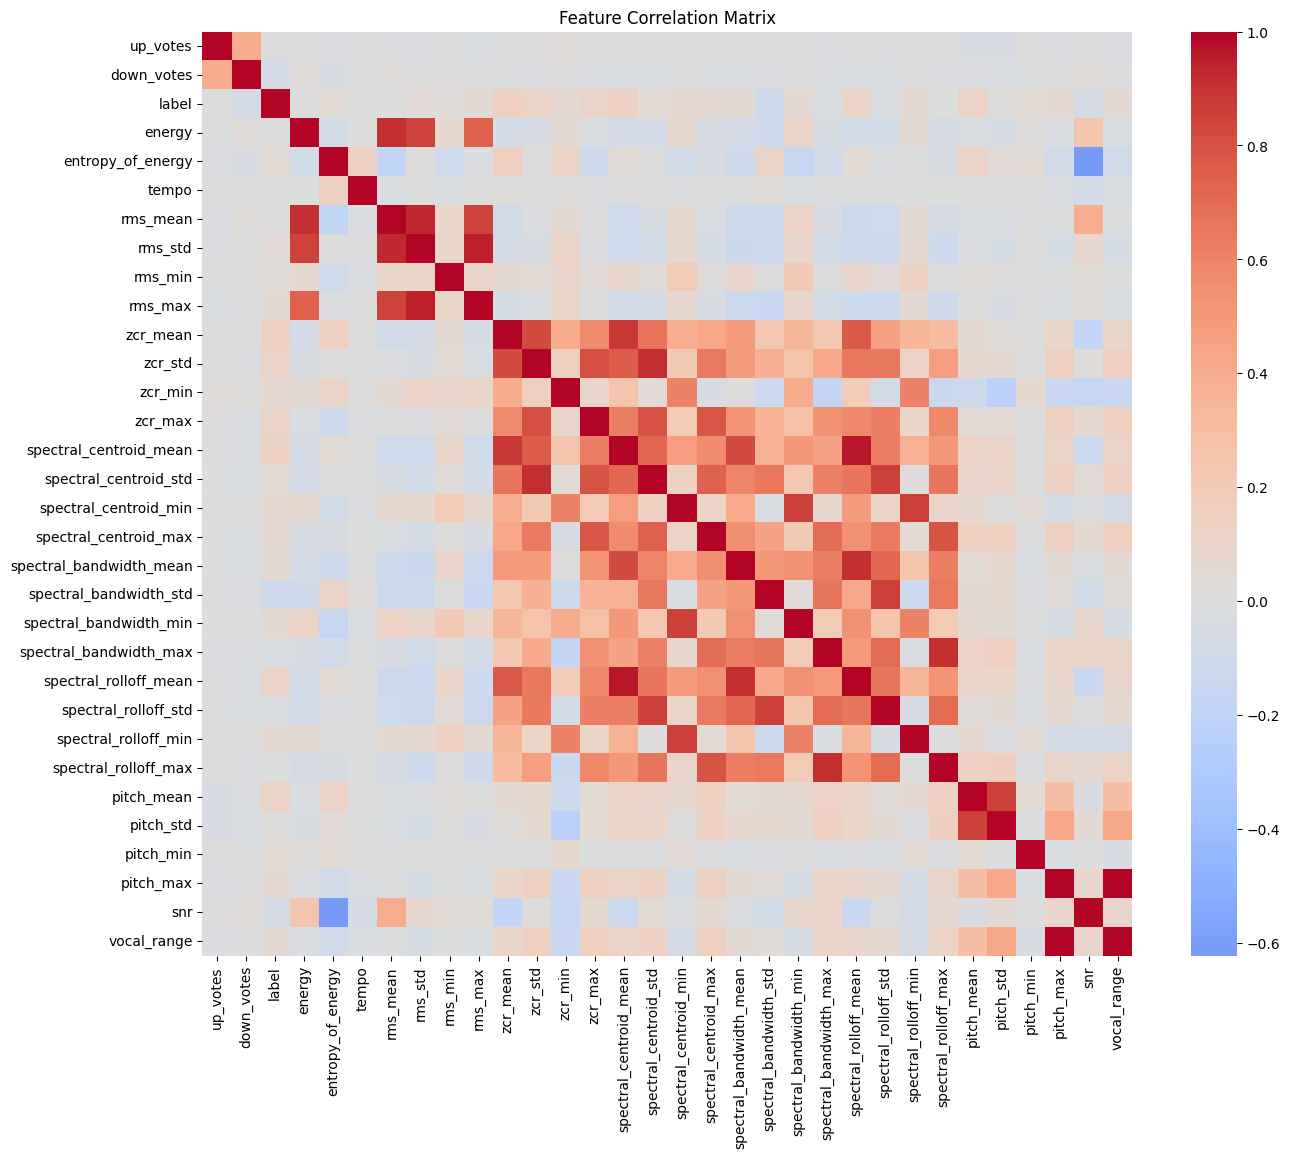

In [20]:
# Calculate correlation matrix
corr_matrix = df_clean.select_dtypes(include=[np.number]).corr()

# Plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [21]:
selected_features = [
    'energy',
    'tempo',
    'rms_mean',
    'zcr_mean',
    'spectral_centroid_mean',
    'spectral_bandwidth_mean',
    'spectral_rolloff_mean',
    'pitch_mean',
    'pitch_std',
    'snr',
    'vocal_range'
]

demographic_features = ['age', 'gender']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df_clean[selected_features + demographic_features]
y = df_clean['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Preprocessing pipeline
numeric_features = selected_features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = demographic_features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
X.head()


X_train shape: (154529, 13), y_train shape: (154529,)
X_test shape: (66227, 13), y_test shape: (66227,)


,energy,tempo,rms_mean,zcr_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,pitch_mean,pitch_std,snr,vocal_range,age,gender
0,0.000328,144.230769,0.011880,0.122321,3681.777540,2654.277278,6370.458984,365.717365,310.307314,0.871099,900.000000,fifties,female
1,0.002533,156.250000,0.030312,0.066971,1921.784250,1666.292094,3707.728795,154.811209,132.641011,0.756535,900.000000,twenties,male
2,0.012298,137.195122,0.075173,0.136679,4370.316394,3114.397729,7376.715583,366.397732,333.865220,0.922380,900.000000,fifties,male
3,0.019366,117.187500,0.095047,0.064027,2176.976751,1826.304991,3832.484461,284.568004,201.053801,0.936262,900.000000,twenties,female
4,0.020807,130.813953,0.099361,0.078881,2232.910767,1682.895418,4040.012348,280.481608,263.555419,0.951599,899.657726,fifties,female


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data (using only audio features)
gender_features = X_train.drop(['age', 'gender'], axis=1)
gender_target = X_train['gender']

# Train/test split
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(
    gender_features, gender_target, test_size=0.3, random_state=42)

# Train model
gender_model = RandomForestClassifier()
gender_model.fit(X_train_gender, y_train_gender)

# Evaluate
print("Gender Accuracy:", gender_model.score(X_test_gender, y_test_gender))

Gender Accuracy: 0.9277594426109278


In [24]:
age_features = X_train.drop(['age', 'gender'], axis=1)
age_target = X_train['age']

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(
    age_features, age_target, test_size=0.3, random_state=42)

age_model = RandomForestClassifier()
age_model.fit(X_train_age, y_train_age)

print("Age Accuracy:", age_model.score(X_test_age, y_test_age))

Age Accuracy: 0.9226903082465109


In [78]:
label_features

,energy,tempo,rms_mean,zcr_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,pitch_mean,pitch_std,snr,vocal_range,age,gender
149544,0.005201,106.132075,0.050007,0.037403,1434.979892,1528.563894,2801.936620,179.625043,147.522861,0.963889,828.823739,0,1
196851,0.020011,114.795918,0.102517,0.051971,1790.333578,1662.379985,3422.986261,225.128622,147.550317,1.052931,900.000000,1,1
49701,0.006624,148.026316,0.060352,0.071219,2291.718250,2048.487000,3966.124798,370.793981,298.472515,1.105794,900.000000,0,0
37619,0.018626,112.500000,0.102950,0.120749,4222.125715,3546.639173,7771.277421,337.582263,213.547203,1.151293,900.000000,1,0
101725,0.056957,114.795918,0.193140,0.078079,2711.327963,2383.777947,4648.393610,229.429788,159.616575,1.380485,900.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185900,0.002493,122.282609,0.036208,0.053437,2404.099941,2842.984028,4793.000681,202.543799,203.377399,1.054080,900.000000,0,1
182761,0.000805,117.187500,0.016368,0.056586,1769.572829,1539.224002,3103.508025,461.987806,343.408725,0.707391,900.000000,1,0
16932,0.012372,96.982759,0.078446,0.056313,1857.664438,1560.036713,3460.952970,319.185854,220.673837,0.996788,900.000000,1,0
115588,0.005225,110.294118,0.036743,0.033369,1335.303483,1507.572576,2512.017645,170.731239,99.249021,0.591300,811.620393,0,1


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load your dataset (replace with your actual data loading)
# df_clean = pd.read_csv("your_data.csv")

# Define features (modify as needed)
# selected_features = ['feature1', 'feature2', ...]  # Your audio features
# demographic_features = ['age', 'gender']          # Demographic features

# Separate features and target
X = df_clean[selected_features + demographic_features]
y = df_clean['label']

# Split data (stratify by label)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# ==============================================
# STEP 1: Train Demographic Predictors (Gender/Age)
# ==============================================

# Gender prediction model (using only audio features)
X_train_gender = X_train[selected_features]
y_train_gender = X_train['gender']

gender_model = RandomForestClassifier(random_state=42)
gender_model.fit(X_train_gender, y_train_gender)

# Age prediction model (using only audio features)
X_train_age = X_train[selected_features]
y_train_age = X_train['age']

age_model = RandomForestClassifier(random_state=42)
age_model.fit(X_train_age, y_train_age)

# Evaluate demographic models
print("=== Gender Model Evaluation ===")
X_test_gender = X_test[selected_features]
print(classification_report(X_test['gender'], gender_model.predict(X_test_gender)))

print("\n=== Age Model Evaluation ===")
X_test_age = X_test[selected_features]
print(classification_report(X_test['age'], age_model.predict(X_test_age)))

# ==============================================
# STEP 2: Prepare Features for Final Model
# ==============================================

# Create encoders (fit only on training data)
gender_encoder = LabelEncoder().fit(X_train['gender'])
age_encoder = LabelEncoder().fit(X_train['age'])

# Generate predicted demographics for train/test sets
X_train_pred = X_train[selected_features].copy()
X_train_pred['pred_gender'] = gender_model.predict(X_train[selected_features])
X_train_pred['pred_age'] = age_model.predict(X_train[selected_features])

X_test_pred = X_test[selected_features].copy()
X_test_pred['pred_gender'] = gender_model.predict(X_test[selected_features])
X_test_pred['pred_age'] = age_model.predict(X_test[selected_features])

# Encode predicted demographics
X_train_pred['pred_gender'] = gender_encoder.transform(X_train_pred['pred_gender'])
X_train_pred['pred_age'] = age_encoder.transform(X_train_pred['pred_age'])
X_test_pred['pred_gender'] = gender_encoder.transform(X_test_pred['pred_gender'])
X_test_pred['pred_age'] = age_encoder.transform(X_test_pred['pred_age'])

# ==============================================
# STEP 3: Train Final Model
# ==============================================

# Preprocessing pipeline
numeric_features = selected_features
categorical_features = ['pred_gender', 'pred_age']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Final model pipeline
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train
final_model.fit(X_train_pred, y_train)

# Evaluate
print("\n=== Final Model Evaluation ===")
y_pred = final_model.predict(X_test_pred)
print(classification_report(y_test, y_pred))

# ==============================================
# STEP 4: Prediction Function
# ==============================================

def predict_label(audio_features):
    """Predict label from audio features using the full pipeline"""
    # Convert to DataFrame if needed
    if not isinstance(audio_features, pd.DataFrame):
        audio_features = pd.DataFrame([audio_features], columns=selected_features)

    # Predict demographics
    pred_gender = gender_model.predict(audio_features)[0]
    pred_age = age_model.predict(audio_features)[0]

    # Encode demographics
    pred_gender_encoded = gender_encoder.transform([pred_gender])[0]
    pred_age_encoded = age_encoder.transform([pred_age])[0]

    # Combine features
    features = audio_features.copy()
    features['pred_gender'] = pred_gender_encoded
    features['pred_age'] = pred_age_encoded

    # Make final prediction
    return final_model.predict(features)[0]

=== Gender Model Evaluation ===
              precision    recall  f1-score   support

      female       0.93      0.85      0.89     19547
        male       0.94      0.97      0.96     46680

    accuracy                           0.94     66227
   macro avg       0.93      0.91      0.92     66227
weighted avg       0.94      0.94      0.94     66227


=== Age Model Evaluation ===
              precision    recall  f1-score   support

     fifties       0.94      0.97      0.95     33113
    twenties       0.97      0.94      0.95     33114

    accuracy                           0.95     66227
   macro avg       0.95      0.95      0.95     66227
weighted avg       0.95      0.95      0.95     66227


=== Final Model Evaluation ===
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     27657
         1.0       0.69      0.49      0.58      5457
         2.0       0.93      0.97      0.95     19023
         3.0       0.96      0.96  